
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
!pip install plotly matplotlib seaborn --quiet

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
medical_df = pd.read_csv('/content/drive/MyDrive/ml_data/medical/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Відповідь

1. Згрупувати дані по курцям (`smoker`) та по регіонам (`region`), щоб подивитись які середні charges мають ці групи.

2. Дослідити кореляцію між числовими колонками (`age`, `bmi`, `children`, `charges`) за допомогою коефіцієнту кореляції Пірсона.

3. Зробити візуальний аналіз для виявлення патернів між змінними та `charges`:
*   Botplot для `charges` за категоріями `smoker` та `sex`, щоб подивитися гендерний склад курців, оскільки курці зазвичай мають більші витрати на страхування.
*   Scatterplot для `bmi` та `charges з кольоровою шкалою по `smoker`, бо зазвичай курці та люди з зайвою вагою мають більші витрати на медичне страхування.



**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [24]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   facet_col='region',
                   marginal='box',
                   title='Distribution Charges by Sex and Region')
fig.update_layout(bargap=0.1)
fig.show()

#Відповідь

*   Найбільші витрати у `southeast`, при чому у чоловіків вони більші, аніж до жінок.

*   Чоловіки мають тенденцію до більших витрат, аніж жінки. Особливо це помітно в `southeast`, який має найбільше значення q3 для чоловіків. А в регіоні `northeast` Q3 чоловіків (16k charges) та жінок (15k) схожі, тобто обидві статі витрачають приблизно однаково на медичне страхування.

*   На заході `southwest` та `northwest` менше дорогих випадків в діапазоні від 30 до 60k charges, розподіл зосереджений навколо нижчих витрат. В деяких діпазонах немає даних про витрати.

*   На сході `southeast` та `northeast` більше дорогих випадків  в діапазоні від 30 до 60k charges, розподіл зосереджений навколо більших витрат. В усіх діапазонах є дані про витрати.







**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [20]:
fig = px.histogram(medical_df,
                   x='smoker',
                   color='region',
                   facet_col='children',
                   marginal='box',
                   title='Distribution Smokers by Region and Children')
fig.update_layout(bargap=0.1)
fig.show()

#Відповідь

*   Некурців значно більше, аніж курців в кожному регіоні
*   Курці частіше без дітей
*   Зі збільшенням кількості дітей кількість курців зменшується, починаючи з 3 дітей. В категорії з п'ятьма дітьми курці практично відсутні у всіх регіонах





**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [26]:
fig = px.violin(medical_df,
                y='charges',
                x='children',
                color='children',
                box=True,
                points="all",
                title="Distribution of Charges by Children")

fig.show()

#Відповідь
Зі збільшенням кількості дітей максимальні витрати чомусь падають.

*   Без дітей: Значний розкид вартості, деякі значення досягають найвищого рівня витрат (близько 60K).
*   Одна та дві дитини: Медіана та розмах витрат зменшуються порівняно з категорією без дітей. Максимальні витрати також нижчі.
*   Три дитини: Розкид витрат зменшується ще більше, максимальні витрати знижуються, але знову відмічаються високі витрати порівняно з двома дітьми.
*   Чотири дитини та п'ять дітей: В обох категоріях спостерігається значне зменшення максимальних витрат. Особливо для п'яти дітей, де медіана та вищі витрати значно нижчі порівняно з іншими категоріями.



**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [27]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [28]:
def estimate_charges(age, w, b):
    return w * age + b

In [29]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

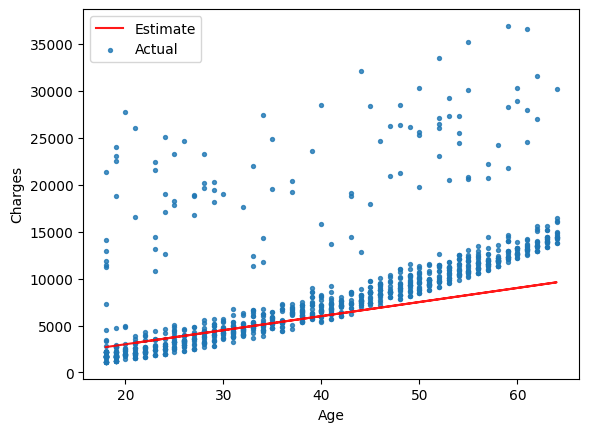

In [41]:
try_parameters(non_smoker_df, 150, 1)

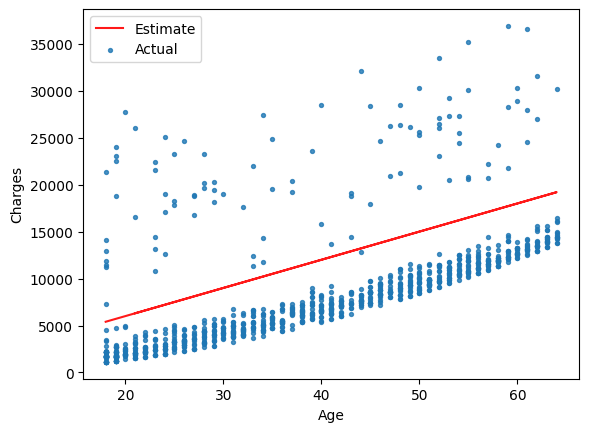

In [52]:
try_parameters(non_smoker_df, 300, 1)

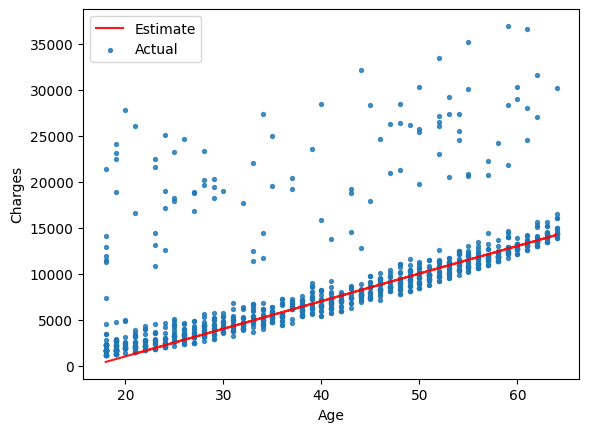

In [58]:
try_parameters(non_smoker_df, 300, -5000)

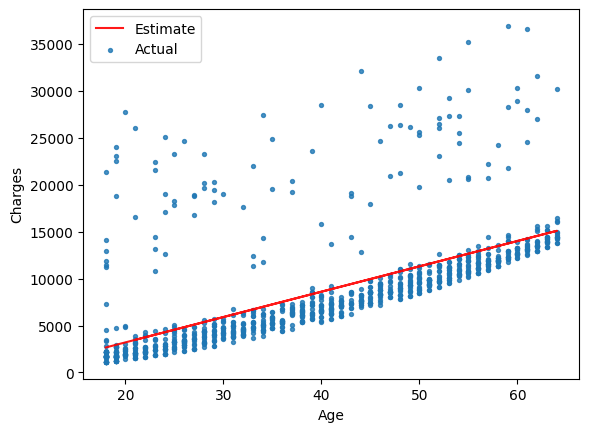

In [114]:
try_parameters(non_smoker_df, 270, -2200)

In [ ]:
try_parameters(non_smoker_df, 270, -2200)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [59]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [61]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 150, 1)
rmse(targets, predicted)

5553.472623415218

In [62]:
predicted = estimate_charges(non_smoker_df.age, 300, 1)
rmse(targets, predicted)

5778.554038231158

In [63]:
predicted = estimate_charges(non_smoker_df.age, 300, -5000)
rmse(targets, predicted)

4956.973980899423

In [115]:
predicted = estimate_charges(non_smoker_df.age, 270, -2200)
rmse(targets, predicted)

4662.666599217586

#Відповідь



1.   Визначити параметри
2.   Перебирати значення параметрів (кут нахилу та положення лінії) і розраховувати loss у RMSE
2.   Повторювати до досягнення найменшого значення loss



In [118]:
predicted = estimate_charges(non_smoker_df.age, 267.25, -2091.42)
rmse(targets, predicted)

4662.505766863269